In [2]:
import json
import os

from src.collocations import get_bigram_collocations, get_trigram_collocations, get_similar_glyphs
from src.discourse import plot_discourse
from src.nearest_neighbor import analyze_glyphs, glyph_bound
from src.processing import load_file, clean_lines, encode_lines, split_sequences
from src.search import search_glyphs
from src.segmentation import vectorize, get_distinctive_glyphs, plot_breakpoints, segment_text

# Text I (Santiago Staff)

### Data processing

In [19]:
# Read the data, reencode to Horley (2021) and split the stanzas

raw_I_data = load_file('data/I.csv')
clean_I_data = clean_lines(raw_I_data)
encoded_I_data = encode_lines(clean_I_data)
_, sequences_I = split_sequences(encoded_I_data)

### Glyph collocations

In [4]:
# Most likely collocations respective to glyph 76

bigrams_I = get_bigram_collocations(sequences_I)
bigrams_I

[(('600.6', '<76>'), 86.30998954252766),
 (('90', '<76>'), 80.69157604926488),
 (('430', '<76>'), 44.0694053644971),
 (('76', '<76>'), 18.062969050466),
 (('90.21', '<76>'), 14.891779069435712),
 (('1v', '<76>'), 14.556705531972124),
 (('633', '<76>'), 14.03404598112618),
 (('700', '<76>'), 13.335396136729994),
 (('99', '<76>'), 11.909502012641163),
 (('290.6', '<76>'), 11.162991146924597),
 (('<76>', '532'), 79.579052739205),
 (('<76>', '11'), 55.05459105649753),
 (('<76>', '71'), 54.79019222974357),
 (('<76>', '70'), 43.15166140418751),
 (('<76>', '75'), 27.425894654315442),
 (('<76>', '4f'), 25.03275083355652),
 (('<76>', '10.79f'), 20.40770816154103),
 (('<76>', '57'), 18.624479779816035),
 (('<76>', '2a.10'), 18.17225933093974),
 (('<76>', '6'), 18.17225933093974),
 (('600', '</s>'), 30.48681769231336),
 (('90', '</s>'), 17.832184933143072),
 (('59', '</s>'), 15.905211780551396),
 (('2', '</s>'), 13.688962071210824),
 (('270.6', '</s>'), 10.920445049634374),
 (('200.10', '</s>'), 

In [5]:
# Most frequent collocations respective to glyph 76

bigrams_I_frequency = get_bigram_collocations(sequences_I, measure="frequency")
bigrams_I_frequency

[(('90', '<76>'), 49),
 (('600.6', '<76>'), 29),
 (('430', '<76>'), 27),
 (('76', '<76>'), 22),
 (('700', '<76>'), 16),
 (('1v', '<76>'), 12),
 (('71', '<76>'), 12),
 (('2', '<76>'), 10),
 (('200.10', '<76>'), 9),
 (('451', '<76>'), 7),
 (('<76>', '71'), 33),
 (('<76>', '532'), 30),
 (('<76>', '70'), 21),
 (('<76>', '11'), 21),
 (('<76>', '600'), 14),
 (('<76>', '4f'), 11),
 (('<76>', '6'), 10),
 (('<76>', '2a.10'), 10),
 (('<76>', '75'), 9),
 (('<76>', '430'), 8),
 (('90', '</s>'), 29),
 (('600', '</s>'), 24),
 (('76', '</s>'), 18),
 (('2', '</s>'), 14),
 (('700', '</s>'), 13),
 (('200.10', '</s>'), 9),
 (('59', '</s>'), 8),
 (('27', '</s>'), 8),
 (('430', '</s>'), 8),
 (('670', '</s>'), 7)]

In [9]:
# Most likely associations of the first two stanza glyphs

trigrams_I = get_trigram_collocations(sequences_I)
trigrams_I

[(('600.6', '<76>', '532'), 167.7774733389341),
 (('90', '<76>', '532'), 161.26209703734247),
 (('90', '<76>', '71'), 136.74940260245918),
 (('90', '<76>', '11'), 136.09630230902766),
 (('600.6', '<76>', '70'), 133.339366361156),
 (('90', '<76>', '70'), 131.9021456495934),
 (('430', '<76>', '532'), 125.98603717421119),
 (('90', '<76>', '21.1'), 113.3689179406339),
 (('600.6', '<76>', '71.61'), 104.72150834586526),
 (('90', '<76>', '57'), 102.09305501814285)]

In [10]:
# Most frequent associations of the first two stanza glyphs

trigrams_I_frequency = get_trigram_collocations(sequences_I, measure="frequency")
trigrams_I_frequency

[(('90', '<76>', '70'), 7),
 (('755', '<76>', '75'), 5),
 (('90', '<76>', '71'), 5),
 (('430', '<76>', '532'), 4),
 (('90', '<76>', '21.1'), 4),
 (('600.6', '<76>', '70'), 4),
 (('71', '<76>', '10.79f'), 4),
 (('600.6', '<76>', '532'), 4),
 (('200.10', '<76>', '71'), 4),
 (('721', '<76>', '70'), 3)]

In [11]:
# Percentage of stanzas that show some repetition
# of the same glyph in different positions

_, percentages_I = get_similar_glyphs(sequences_I)
percentages_I

{'XYX': 0.045871559633027525,
 'XXZ': 0.04357798165137615,
 'XYY': 0.027522935779816515}

### Text segmentation

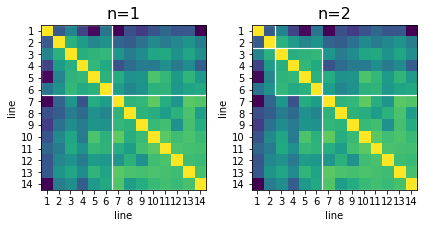

In [12]:
# Vectorize the whole text using count vectorizer and
# plot the segments based on cosine distance using one
# and two breakpoints

vectorized_text, _ = vectorize(encoded_I_data)
bkpts = plot_breakpoints(vectorized_text, [1, 2])

In [15]:
# Most distinctive glyphs of each segment using TF-IDF

segmented_text = segment_text(encoded_I_data, bkpts[0])
distinctive_glyphs = get_distinctive_glyphs(segmented_text)
distinctive_glyphs

[['600', '76', '430', '430.76', '90', '532', '90.76', '700.76', '75', '700'],
 ['90.76', '71', '11', '76', '532', '600.6.76', '600', '90', '70', '2a.10']]

### Glyph distribution

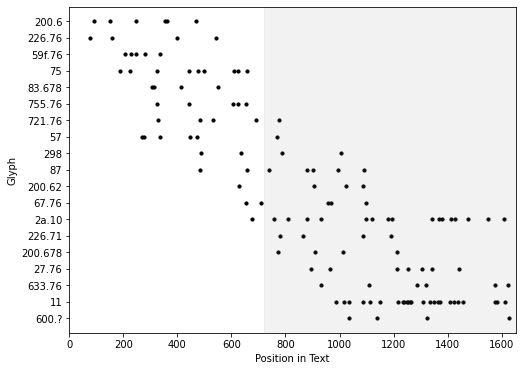

In [16]:
# Glyphs that show significant clustering in their distribution
# within the text

clustered_glyphs, _ = analyze_glyphs(encoded_I_data)
plot_discourse(clustered_glyphs, encoded_I_data, bkpt=bkpts[0][0])

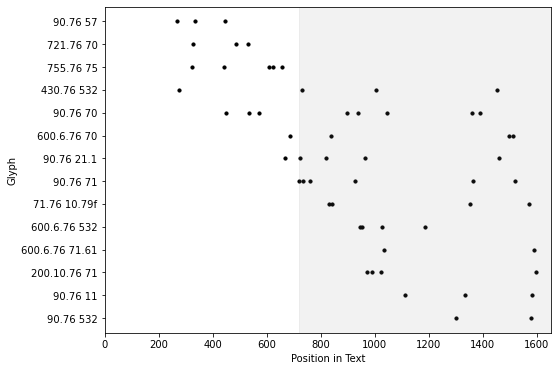

In [17]:
# Distribution of the most likely/frequent associations between
# the first two stanza glyphs

trigrams_formatted = [[f'{trigram[0][0]}.76', trigram[0][2]] for trigram in trigrams_I]
for trigram in trigrams_I_frequency:
    if [f'{trigram[0][0]}.76', trigram[0][2]] not in trigrams_formatted:
        trigrams_formatted.append([f'{trigram[0][0]}.76', trigram[0][2]])
trigrams_sorted = sorted(trigrams_formatted, key=lambda x: glyph_bound(x, encoded_I_data))
plot_discourse(trigrams_sorted, encoded_I_data, bkpt=bkpts[0][0])

### Matches outside of text I

In [18]:
# Search the corpus for combinations of the first two stanza glyphs
# occuring more than once

XY = [(seq[0], seq[2]) for seq in sequences_I if '?' not in seq[0] and '?' not in seq[2]]
XY = [glyphs for glyphs in set(XY) if XY.count(glyphs) > 1]
search_results = search_glyphs(XY)
search_results

{'9 2': ['Sb8'],
 '381.6 11': ['Aa8'],
 '700 381': ['Qr6', 'Er8'],
 '430 48f': ['Pv7'],
 '430 5': ['Ab3'],
 '90 71': ['Ev2'],
 '90 5': ['Pv1', 'Qv2', 'Hr11'],
 '600.6 600': ['Cb2'],
 '90 70': ['Sb8', 'Aa2'],
 '90 11': ['Aa2']}

# Text Gv (verso of Small Santiago Tablet)

### Data processing

In [21]:
raw_Gv_data = load_file('data/Gv.csv')
clean_Gv_data = clean_lines(raw_Gv_data)
encoded_Gv_data = encode_lines(clean_Gv_data)
_, sequences_Gv = split_sequences(encoded_Gv_data)

### Glyph collocations

In [22]:
# Most likely collocations respective to glyph 76

bigrams_Gv = get_bigram_collocations(sequences_Gv)
bigrams_Gv

[(('430', '<76>'), 10.304570821078993),
 (('660', '<76>'), 8.628683760603025),
 (('670', '<76>'), 5.048451138739251),
 (('5', '<76>'), 2.6179993043408443),
 (('<76>', '200f'), 17.494269243720588),
 (('<76>', '70'), 8.628683760603025),
 (('32', '</s>'), 8.763398730209968),
 (('90f', '</s>'), 8.628683760603025),
 (('59f', '</s>'), 5.048451138739251),
 (('22', '</s>'), 3.5621668788614578)]

In [23]:
# Percentage of stanzas that show some repetition
# of the same glyph in different positions

_, percentages_Gv = get_similar_glyphs(sequences_Gv)
percentages_Gv

{'XYX': 0.21875, 'XXZ': 0.0625, 'XYY': 0.09375}

# Text T (Honolulu Tablet)

### Data processing

In [25]:
raw_T_data = load_file('data/T.csv')
clean_T_data = clean_lines(raw_T_data)
encoded_T_data = encode_lines(clean_T_data)
_, sequences_T = split_sequences(encoded_T_data)

### Glyph collocations

In [26]:
# Most likely collocations respective to glyph 76

bigrams_T = get_bigram_collocations(sequences_T)
bigrams_T

[(('430', '<76>'), 4.678702588007328),
 (('<76>', '532'), 8.024679218708592),
 (('<76>', '70'), 4.476845027126553),
 (('<76>', '430'), 1.4889447439826093)]